#Preparing the data
* Importing libraries
* Getting mutations profile

In [29]:
#import libraries

import scipy.io as sio
import numpy as np
import math
import pandas as pd
from google.colab import files
import csv
import random
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
from scipy.stats import mannwhitneyu
from scipy.stats import gmean
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.colors as mcolors

In [4]:
#read the profiles
control_path = '/content/drive/MyDrive/RT_signatures/crispr_indels_control_all_upd.ID28.all'
exp_path = '/content/drive/MyDrive/RT_signatures/crispr_indels_exp_all_upd.ID28.all'

control = pd.read_csv(control_path, sep='\t')
exp = pd.read_csv(exp_path, sep='\t')
print(control.head(), exp.head()) #$

  MutationType  ATP2B4_2_s3  ATP2B4_2_s4  ATP2B4_2_s5  ATP2B4_2_s7  \
0    1:Del:C:0            0            1            0            0   
1    1:Del:C:1            0            0            0            0   
2    1:Del:C:2            0            0            0            0   
3    1:Del:C:3            0            1            1            0   
4    1:Del:C:4            0            0            0            0   

   ATP2B4_5_s4  ATP2B4_5_s5  ATP2B4_5_s6  ATP2B4_5_s8  
0            0            0            0            0  
1            1            0            1            0  
2            0            0            0            0  
3            0            1            0            0  
4            0            0            0            0     MutationType  ATM_148_s1  ATM_148_s2  ATM_16_s1  ATM_16_s2  C1orf86_136_s1  \
0    1:Del:C:0           0           0          0          0               0   
1    1:Del:C:1           0           0          0          2               0   
2  

In [5]:
#create list of control data
control_columns = []
for column in control.columns[1:]:  # from column 2
    control_columns.append(control[column].tolist())
print(len(control_columns), control_columns) #$

#create list of exp data
exp_columns = []
for column in exp.columns[1:]:
  exp_columns.append(exp[column].tolist())
print(len(exp_columns), exp_columns) #$

8 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 6, 1], [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 3, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 3, 4, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 1, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 2, 2], [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1]]
164 [[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 4, 3, 0], [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0], [0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 

#Replicates RT
* Getting mutations profiles divided to 2 RT regions (ERR & LRR)


In [6]:
#read the data
control_early_p = '/content/drive/MyDrive/RT_signatures/crispr_indels_control_early_upd.ID28.all'
control_late_p = '/content/drive/MyDrive/RT_signatures/crispr_indels_control_late_upd.ID28.all'
exp_early_p = '/content/drive/MyDrive/RT_signatures/crispr_indels_exp_early_upd.ID28.all'
exp_late_p = '/content/drive/MyDrive/RT_signatures/crispr_indels_exp_late_upd.ID28.all'

control_e = pd.read_csv(control_early_p, sep='\t')
control_l = pd.read_csv(control_late_p, sep='\t')
exp_e = pd.read_csv(exp_early_p, sep='\t')
exp_l = pd.read_csv(exp_late_p, sep='\t')

print(control_e.head(), control_l.head(), exp_e.head(), exp_l.head()) #$
print(control_e.shape, control_l.shape, exp_e.shape, exp_l.shape)

  MutationType  ATP2B4_2_s3  ATP2B4_2_s4  ATP2B4_2_s5  ATP2B4_2_s7  \
0    1:Del:C:0            0            1            0            0   
1    1:Del:C:1            0            0            0            0   
2    1:Del:C:2            0            0            0            0   
3    1:Del:C:3            0            1            1            0   
4    1:Del:C:4            0            0            0            0   

   ATP2B4_5_s4  ATP2B4_5_s5  ATP2B4_5_s6  ATP2B4_5_s8  
0            0            0            0            0  
1            1            0            1            0  
2            0            0            0            0  
3            0            1            0            0  
4            0            0            0            0     MutationType  ATP2B4_2_s3  ATP2B4_2_s4  ATP2B4_2_s5  ATP2B4_2_s7  \
0    1:Del:C:0            0            0            0            0   
1    1:Del:C:1            0            0            0            0   
2    1:Del:C:2            0      

In [7]:
# Handling missing replicates - add them as '0' columns
# Early: DCLRE1A_41_s2, REV1_52_s1, RNF8_12_s2
# LATE: MDC1_126_s2, PRIMPOL_133_s2, RECQL5_154_s2

early_missing = ['DCLRE1A_41_s2', 'REV1_52_s1', 'RNF8_12_s2']
late_missing = ['MDC1_126_s2', 'PRIMPOL_133_s2', 'RECQL5_154_s2']

for val in early_missing:
  column_index = list(exp.columns).index(val)
  exp_e.insert(column_index, val, 0)
for val in late_missing:
  column_index = list(exp.columns).index(val)
  exp_l.insert(column_index, val, 0)
#print(exp_e.head(), exp_l.head())

# Check that all 3 df's contain the same values in the sampe order:
e_equal = exp.columns[1:] == exp_e.columns[1:]
l_equal = exp.columns[1:] == exp_l.columns[1:]
print(e_equal, l_equal)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True] [

In [8]:
# Create lists with the data of each df
control_e_columns = []
control_l_columns = []
exp_e_columns = []
exp_l_columns = []

for column in control_e.columns[1:]:
    control_e_columns.append(control_e[column].tolist())
for column in control_l.columns[1:]:
    control_l_columns.append(control_l[column].tolist())
for column in exp_e.columns[1:]:
    exp_e_columns.append(exp_e[column].tolist())
for column in exp_l.columns[1:]:
    exp_l_columns.append(exp_l[column].tolist())

print(len(control_e_columns), len(control_l_columns), len(exp_e_columns), len(exp_l_columns)) #$


8 8 164 164


In [13]:
# Create new profile (8 bases)
def create_8_profile(df):
  # Sum groups of 6 rows and add them to the new list - indels of 1 bp
  new_rows = []
  for i in range(0, 24, 6):  # 0, 6, 12, 18
      summed_row = df.iloc[i:i+6, 1:].sum()
      new_rows.append(summed_row)

  # Add rows 25 to 28 (index 24 to 27) directly
  for j in range(24, 28):  # 24, 25, 26, 27
      new_rows.append(df.iloc[j])

  # Create the new DataFrame
  new_df = pd.DataFrame(new_rows, columns=df.columns[1:])

  # Reset the index of the new DataFrame
  new_df.reset_index(drop=True, inplace=True)

  mutation_types = ['1:Del:C', '1:Del:T', '1:Ins:C', '1:Ins:T', 'long_Del', 'long_Ins', 'MH', 'complex']
  new_df.insert(0, 'MutationType', mutation_types)
  return new_df

control_8 = create_8_profile(control)
control_e_8 = create_8_profile(control_e)
control_l_8 = create_8_profile(control_l)
exp_8 = create_8_profile(exp)
exp_e_8 = create_8_profile(exp_e)
exp_l_8 = create_8_profile(exp_l)

print(control_8.shape, control_e_8.shape, control_l_8.shape, exp_8.shape, exp_e_8.shape, exp_l_8.shape)
print('ALL\n', control_8, '\nEARLY\n', control_e_8, '\nLATE\n', control_l_8)

(8, 9) (8, 9) (8, 9) (8, 165) (8, 165) (8, 165)
ALL
   MutationType  ATP2B4_2_s3  ATP2B4_2_s4  ATP2B4_2_s5  ATP2B4_2_s7  \
0      1:Del:C            0            2            1            0   
1      1:Del:T            2            2            4            3   
2      1:Ins:C            0            0            0            1   
3      1:Ins:T            1            2            3            0   
4     long_Del            2            2            3            2   
5     long_Ins            0            1            1            3   
6           MH            1            6            3            4   
7      complex            1            1            0            0   

   ATP2B4_5_s4  ATP2B4_5_s5  ATP2B4_5_s6  ATP2B4_5_s8  
0            1            1            1            0  
1            0            2            1            6  
2            0            0            0            0  
3            2            0            3            1  
4            3            0         

In [14]:
# Get the new columns of the converted dfs
control_8_columns = []
control_e_8_columns = []
control_l_8_columns = []
exp_8_columns = []
exp_e_8_columns = []
exp_l_8_columns = []

for column in control_8.columns[1:]:
    control_8_columns.append(control_8[column].tolist())
for column in control_e_8.columns[1:]:
    control_e_8_columns.append(control_e_8[column].tolist())
for column in control_l_8.columns[1:]:
    control_l_8_columns.append(control_l_8[column].tolist())
for column in exp_8.columns[1:]:
  exp_8_columns.append(exp_8[column].tolist())
for column in exp_e_8.columns[1:]:
    exp_e_8_columns.append(exp_e_8[column].tolist())
for column in exp_l_8.columns[1:]:
    exp_l_8_columns.append(exp_l_8[column].tolist())

print(len(control_8_columns[0]), len(control_e_8_columns[0]), len(control_l_8_columns[0]), len(exp_8_columns[0]), len(exp_e_8_columns[0]), len(exp_l_8_columns[0]))

8 8 8 8 8 8


#Mutations burden analysis
* Mutations burden analysis - mann-whitney tests (with expansions)

In [10]:
exp_names = list(exp.columns[1:])
control_names = ['ATP2B4']*len(control_columns)
print(len(exp_names), exp_names)
print(sorted(exp_names))

164 ['ATM_148_s1', 'ATM_148_s2', 'ATM_16_s1', 'ATM_16_s2', 'C1orf86_136_s1', 'C1orf86_136_s2', 'C1orf86_139_s1', 'C1orf86_139_s2', 'C9orf142_113_s1', 'C9orf142_113_s2', 'C9orf142_129_s1', 'C9orf142_129_s2', 'DCLRE1A_41_s2', 'DCLRE1A_41_s4', 'DCLRE1A_42_s4', 'EXO1_71_s2', 'EXO1_71_s3', 'EXO1_71_s4', 'FAN1_122_s1', 'FAN1_122_s2', 'FAN1_19_s1', 'FAN1_19_s2', 'FANCM_10_s1', 'FANCM_10_s2', 'FANCM_140_s1', 'FANCM_140_s2', 'MDC1_126_s1', 'MDC1_126_s2', 'MDC1_126_s3', 'MDC1_126_s4', 'MLH1_172_s1', 'MLH1_172_s2', 'MLH1_173_s1', 'MLH1_173_s2', 'MSH2_120_s1', 'MSH2_120_s2', 'MSH2_120_s3', 'MSH6_3_s4', 'MSH6_3_s5', 'MSH6_3_s6', 'MSH6_3_s8', 'MSH6_4_s2', 'MSH6_4_s3', 'MSH6_4_s4', 'MSH6_4_s7', 'NBN_62_s3', 'NBN_62_s4', 'NHEJ1_65_s1', 'NHEJ1_65_s2', 'NHEJ1_9_s1', 'NHEJ1_9_s2', 'OGG1_106_s1', 'OGG1_106_s2', 'OGG1_25_s1', 'OGG1_25_s2', 'PARP1_128_s1', 'PARP1_128_s2', 'PARP1_18_s2', 'PARP2_137_s1', 'PARP2_137_s2', 'PARP2_96_s1', 'PARP2_96_s2', 'PIAS1_13_s1', 'PIAS1_13_s2', 'PIAS1_142_s1', 'PIAS1_142_s2'

In [15]:
# Get the counts of each control and exp data
def get_counts_data(control, exp):
  control_counts = []
  exp_counts = []
  for col in control:
    control_counts.append(sum(col))
  for col in exp:
    exp_counts.append(sum(col))
  return control_counts, exp_counts

all_control_counts, all_exp_counts = get_counts_data(control_8_columns, exp_8_columns)
early_control_counts, early_exp_counts = get_counts_data(control_e_8_columns, exp_e_8_columns)
late_control_counts, late_exp_counts = get_counts_data(control_l_8_columns, exp_l_8_columns)

In [16]:
# For each KO (42) calculate mann-whitney U score againt the relative control
def calculate_mann_whitney(exp_sums, control_sums):

  p_vals = [] #list of the p-vals from each test (42 total)
  exp_sums_specific = [] #list of mutation count for each KO (42 total)
  ref_name = exp_names[0].split('_')[0]
  ko = []
  tmp = [exp_sums[0]]
  for j,name in enumerate(exp_names[1:]):
    n = name.split('_')[0]
    if n == ref_name: #same KO
      tmp.append(exp_sums[j+1])
    else: #new KO
      statistic, p_value = mannwhitneyu(control_sums, tmp)
      p_vals.append(p_value)
      exp_sums_specific.append(sorted(tmp))
      ko.append(ref_name)
      ref_name = n
      tmp = [exp_sums[j+1]]
  #last KO
  exp_sums_specific.append(sorted(tmp))
  statistic, p_value = mannwhitneyu(control_sums, tmp)
  p_vals.append(p_value)
  ko.append(ref_name)

  data = {
    'Gene': ko,
    'Count': exp_sums_specific,
    'Control': [control_sums]*42,
    'P-val': p_vals
  }
  df = pd.DataFrame(data)
  return df, ko

all_df, ko = calculate_mann_whitney(all_exp_counts, all_control_counts)
early_df, ko = calculate_mann_whitney(early_exp_counts, early_control_counts)
late_df, ko = calculate_mann_whitney(late_exp_counts, late_control_counts)

In [17]:
def find_min_pval_df(gene, all, early, late):
    # Select the p-val for the specific gene
    pval1 = all[all['Gene'] == gene]['P-val'].iloc[0] if gene in all['Gene'].values else float('inf')
    pval2 = early[early['Gene'] == gene]['P-val'].iloc[0] if gene in early['Gene'].values else float('inf')
    pval3 = late[late['Gene'] == gene]['P-val'].iloc[0] if gene in late['Gene'].values else float('inf')

    # Find the DataFrame with the minimal p-val for the gene
    min_pval_df_name = min((('all', pval1), ('early', pval2), ('late', pval3)), key=lambda x: x[1])[0]
    min_pval_value = min(pval1, pval2, pval3)

    return {'Gene': gene, 'Source': min_pval_df_name, 'MinPVal': min_pval_value}

# Create a list of dictionaries for each gene
gene_dicts = [find_min_pval_df(gene, all_df, early_df, late_df) for gene in ko]

# Create the final DataFrame
result_df = pd.DataFrame(gene_dicts)
print(result_df)


        Gene Source   MinPVal
0        ATM   late  0.339899
1    C1orf86    all  0.104798
2   C9orf142   late  0.098644
3    DCLRE1A    all  0.024093
4       EXO1  early  0.017308
5       FAN1  early  0.533768
6      FANCM   late  0.031596
7       MDC1  early  0.012023
8       MLH1  early  0.007800
9       MSH2  early  0.017308
10      MSH6  early  0.000891
11       NBN  early  0.175158
12     NHEJ1   late  0.141677
13      OGG1    all  0.232842
14     PARP1  early  0.028631
15     PARP2   late  0.071492
16     PIAS1   late  0.047183
17     PIAS4   late  0.226188
18      PIF1  early  0.190673
19      PMS1   late  0.008134
20      PMS2  early  0.007800
21      POLB  early  0.018500
22     POLE3  early  0.192306
23     POLE4   late  0.008022
24      POLI   late  0.389051
25      POLM   late  0.226188
26      POLN  early  0.728083
27      POLQ   late  0.168159
28   PRIMPOL   late  0.226188
29     PRKDC  early  0.022492
30     RAD18   late  0.031596
31    RECQL5    all  0.267083
32      RE

In [18]:
#get all the genes that their min_Pval is greater than 0.1
big01_genes = result_df[result_df['MinPVal'] > 0.1]['Gene'].tolist()
print(len(big01_genes), big01_genes)

20 ['ATM', 'C1orf86', 'FAN1', 'NBN', 'NHEJ1', 'OGG1', 'PIAS4', 'PIF1', 'POLE3', 'POLI', 'POLM', 'POLN', 'POLQ', 'PRIMPOL', 'RECQL5', 'RNF168', 'TP53', 'UNG', 'WRN', 'XRCC4']


In [19]:
# Filter all_df to include only the genes with min_p_val>0.1 (that will join the control)
big01_df = all_df[all_df['Gene'].isin(big01_genes)]
# Find the gene with the minimum P-value within the specified genes
min_pval_gene = big01_df.loc[big01_df['P-val'].idxmin(), 'Gene']
pval_threshold = big01_df.loc[big01_df['P-val'].idxmin(), 'P-val']
print(f"The gene with the minimum all_P-value among the big0.1 is: {min_pval_gene}")
print(f"The corresponding P-value is: {pval_threshold}")
control_genes = all_df[all_df['P-val']>=pval_threshold]['Gene'].tolist() # a list of the genes that their all_pval is bigger than the threshold we found (1.33333)
print(len(control_genes), control_genes)

The gene with the minimum all_P-value among the big0.1 is: C1orf86
The corresponding P-value is: 0.10479814072638767
27 ['ATM', 'C1orf86', 'C9orf142', 'FAN1', 'FANCM', 'NBN', 'NHEJ1', 'OGG1', 'PARP2', 'PIAS1', 'PIAS4', 'PIF1', 'POLB', 'POLE3', 'POLI', 'POLM', 'POLN', 'POLQ', 'PRIMPOL', 'RECQL5', 'REV1', 'RNF168', 'SETX', 'TP53', 'UNG', 'WRN', 'XRCC4']


In [20]:
all_new_control_df = all_df[all_df['Gene'].isin((control_genes))] #df of the samples that become control
all_new_control_list = all_new_control_df['Count'].tolist() #list of the control counts
all_new_control_counts = [item for sublist in all_new_control_list for item in sublist]
all_new_control_counts = all_control_counts + all_new_control_counts
all_new_control_names = control_names +all_new_control_df['Gene'].tolist()
print(len(all_new_control_list), all_new_control_list, '\n', len(all_new_control_counts), all_new_control_counts, '\n', len(all_new_control_names), all_new_control_names)

early_new_control_df = early_df[early_df['Gene'].isin((control_genes))] #df of the samples that become control
early_new_control_list = early_new_control_df['Count'].tolist() #list of the control counts
early_new_control_counts = [item for sublist in early_new_control_list for item in sublist]
early_new_control_counts = early_control_counts + early_new_control_counts
early_new_control_names = control_names +early_new_control_df['Gene'].tolist()
print(len(early_new_control_list), early_new_control_list, '\n', len(early_new_control_counts), early_new_control_counts, '\n', len(early_new_control_names), early_new_control_names)

late_new_control_df = late_df[late_df['Gene'].isin((control_genes))] #df of the samples that become control
late_new_control_list = late_new_control_df['Count'].tolist() #list of the control counts
late_new_control_counts = [item for sublist in late_new_control_list for item in sublist]
late_new_control_counts = late_control_counts + late_new_control_counts
late_new_control_names = control_names +late_new_control_df['Gene'].tolist()
print(len(late_new_control_list), late_new_control_list, '\n', len(late_new_control_counts), late_new_control_counts, '\n', len(late_new_control_names), late_new_control_names)

27 [[5, 9, 14, 17], [6, 7, 8, 11], [8, 8, 9, 10], [6, 9, 13, 13], [3, 5, 9, 12], [6, 9], [4, 4, 10, 14], [5, 6, 7, 22], [7, 7, 9, 12], [4, 6, 10, 11], [5, 8, 10, 13], [9, 11, 11, 18], [11, 12, 14, 16], [8, 9, 10, 12], [4, 8, 9, 19], [4, 10, 11, 16], [10, 12, 12, 13], [5, 8, 8, 16], [1, 8, 10, 11], [4, 8, 10, 11], [1, 4, 10, 14], [8, 9, 12, 16], [6, 8, 9, 10], [7, 11, 16], [6, 8, 8, 16], [9, 9, 11, 14], [9, 9, 13, 17]] 
 113 [7, 16, 15, 13, 9, 8, 10, 13, 5, 9, 14, 17, 6, 7, 8, 11, 8, 8, 9, 10, 6, 9, 13, 13, 3, 5, 9, 12, 6, 9, 4, 4, 10, 14, 5, 6, 7, 22, 7, 7, 9, 12, 4, 6, 10, 11, 5, 8, 10, 13, 9, 11, 11, 18, 11, 12, 14, 16, 8, 9, 10, 12, 4, 8, 9, 19, 4, 10, 11, 16, 10, 12, 12, 13, 5, 8, 8, 16, 1, 8, 10, 11, 4, 8, 10, 11, 1, 4, 10, 14, 8, 9, 12, 16, 6, 8, 9, 10, 7, 11, 16, 6, 8, 8, 16, 9, 9, 11, 14, 9, 9, 13, 17] 
 35 ['ATP2B4', 'ATP2B4', 'ATP2B4', 'ATP2B4', 'ATP2B4', 'ATP2B4', 'ATP2B4', 'ATP2B4', 'ATM', 'C1orf86', 'C9orf142', 'FAN1', 'FANCM', 'NBN', 'NHEJ1', 'OGG1', 'PARP2', 'PIAS1', 'PI

In [21]:
#mann whitney - expanded control
#get the p-values of all exp
name = exp_names[0].split('_')[0]
counts = [all_exp_counts[0]]
all_u_pvals = []
print('ALL:')
print('control: ', np.median(all_new_control_counts))
for i in range(1, len(exp_names)):
  if exp_names[i].split('_')[0]!=name: #new exp
    statistic, p_value = mannwhitneyu(all_new_control_counts, counts)
    all_u_pvals.extend([p_value]*len(counts))
    name = exp_names[i].split('_')[0]
    counts = [all_exp_counts[i]]
  else: #same exp
    counts.append(all_exp_counts[i])
#last example
statistic, p_value = mannwhitneyu(all_new_control_counts, counts)
all_u_pvals.extend([p_value]*len(counts))

#get the p-values of early exp
name = exp_names[0].split('_')[0]
counts = [early_exp_counts[0]]
early_u_pvals = []
print('\n\nEARLY:')
print('control: ', np.median(early_new_control_counts))
for i in range(1, len(exp_names)):
  if exp_names[i].split('_')[0]!=name: #new exp
    statistic, p_value = mannwhitneyu(early_new_control_counts, counts)
    early_u_pvals.extend([p_value]*len(counts))
    name = exp_names[i].split('_')[0]
    counts = [early_exp_counts[i]]
  else: #same exp
    counts.append(early_exp_counts[i])
#last example
statistic, p_value = mannwhitneyu(early_new_control_counts, counts)
early_u_pvals.extend([p_value]*len(counts))


#get the p-values of late exp
name = exp_names[0].split('_')[0]
counts = [late_exp_counts[0]]
late_u_pvals = []
print('\n\nLATE:')
print('control: ', np.median(late_new_control_counts))
for i in range(1, len(exp_names)):
  if exp_names[i].split('_')[0]!=name: #new exp
    statistic, p_value = mannwhitneyu(late_new_control_counts, counts)
    late_u_pvals.extend([p_value]*len(counts))
    name = exp_names[i].split('_')[0]
    counts = [late_exp_counts[i]]
  else: #same exp
    counts.append(late_exp_counts[i])
#last example
statistic, p_value = mannwhitneyu(late_new_control_counts, counts)
late_u_pvals.extend([p_value]*len(counts))

reject, all_u_p_adj, _, _ = multipletests(all_u_pvals, method='fdr_bh')
reject, early_u_p_adj, _, _ = multipletests(early_u_pvals, method='fdr_bh')
reject, late_u_p_adj, _, _ = multipletests(late_u_pvals, method='fdr_bh')

ALL:
control:  9.0


EARLY:
control:  5.0


LATE:
control:  5.0


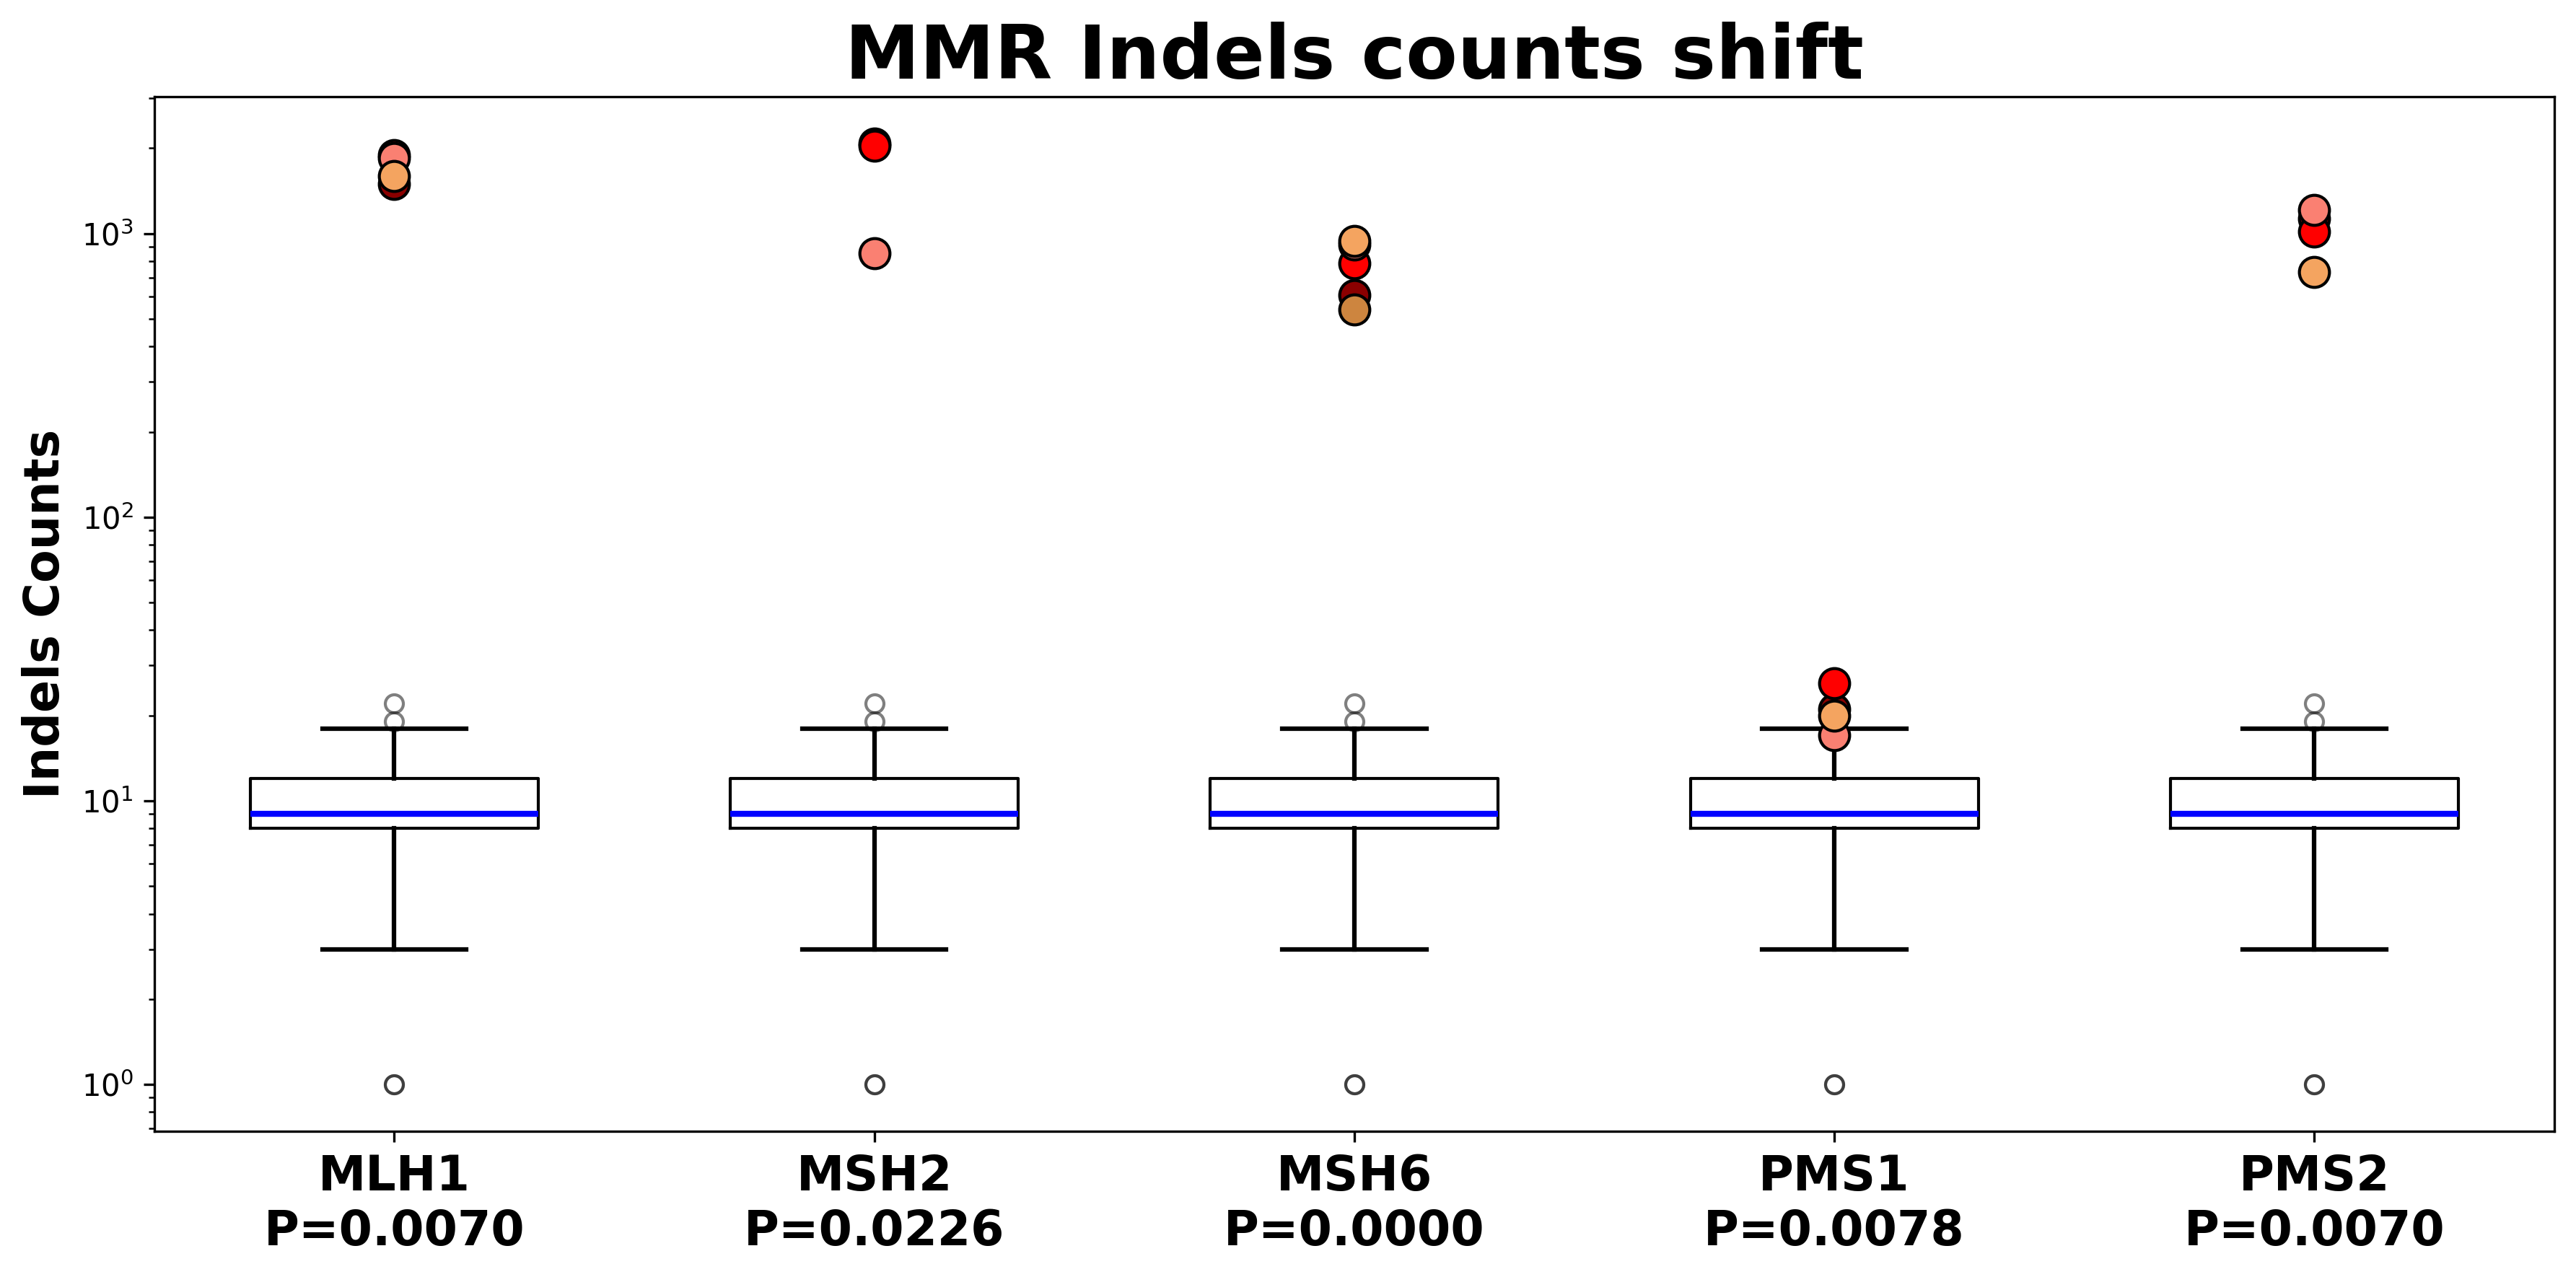

In [24]:
#boxplot of counts results
# Sample data
i1= [i for i, val in enumerate(exp_names) if val.startswith('MLH1')] # indices of MLH1 ko
i2= [i for i, val in enumerate(exp_names) if val.startswith('MSH2')] # indices of MSH2 ko
i3= [i for i, val in enumerate(exp_names) if val.startswith('MSH6')] # indices of MSH6 ko
i4= [i for i, val in enumerate(exp_names) if val.startswith('PMS1')] # indices of PMS1 ko
i5= [i for i, val in enumerate(exp_names) if val.startswith('PMS2')] # indices of PMS2 ko

#print(len(ind), ind, exp_names[ind[0]], exp_names[ind[1]], exp_names[ind[2]])
c_ko_1 = [all_exp_counts[i] for i in i1] # distance of MLH1 ko from the control normalized center
p_ko_1 = [all_u_p_adj[i] for i in i1] # corrected p-values of MLH1 ko
c_ko_2 = [all_exp_counts[i] for i in i2] # distance of MSH2 ko from the control normalized center
p_ko_2 = [all_u_p_adj[i] for i in i2] # corrected p-values of MSH2 ko
c_ko_3 = [all_exp_counts[i] for i in i3] # distance of MSH6 ko from the control normalized center
p_ko_3 = [all_u_p_adj[i] for i in i3] # corrected p-values of MSH6 ko
c_ko_4 = [all_exp_counts[i] for i in i4] # distance of PMS1 ko from the control normalized center
p_ko_4 = [all_u_p_adj[i] for i in i4] # corrected p-values of PMS1 ko
c_ko_5 = [all_exp_counts[i] for i in i5] # distance of PMS2 ko from the control normalized center
p_ko_5 = [all_u_p_adj[i] for i in i5] # corrected p-values of PMS2 ko

colors = ['darkred', 'red', 'salmon', 'sandybrown', 'peru']

# Create the boxplot
plt.figure(figsize=(12, 6), dpi=300)

# Create the early boxplot
plt.boxplot(all_new_control_counts, positions=[1], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c, p) in enumerate(zip(c_ko_1, colors[:len(c_ko_1)], p_ko_1)):
    plt.scatter(1, value, color=c, s=100, edgecolor='black', zorder=3)

# Create the early boxplot
plt.boxplot(all_new_control_counts, positions=[2], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c, p) in enumerate(zip(c_ko_2, colors[:len(c_ko_2)], p_ko_2)):
    plt.scatter(2, value, color=c, s=100, edgecolor='black', zorder=3)

# Create the early boxplot
plt.boxplot(all_new_control_counts, positions=[3], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c, p) in enumerate(zip(c_ko_3, colors[:len(c_ko_3)], p_ko_3)):
    plt.scatter(3, value, color=c, s=100, edgecolor='black', zorder=3)

# Create the early boxplot
plt.boxplot(all_new_control_counts, positions=[4], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c, p) in enumerate(zip(c_ko_4, colors[:len(c_ko_4)], p_ko_4)):
    plt.scatter(4, value, color=c, s=100, edgecolor='black', zorder=3)

# Create the early boxplot
plt.boxplot(all_new_control_counts, positions=[5], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c, p) in enumerate(zip(c_ko_5, colors[:len(c_ko_5)], p_ko_5)):
    plt.scatter(5, value, color=c, s=100, edgecolor='black', zorder=3)


# Customize x-axis
plt.xticks([1, 2, 3, 4, 5], [f'MLH1\nP={gmean(p_ko_1):.4f}', f'MSH2\nP={gmean(p_ko_2):.4f}', f'MSH6\nP={gmean(p_ko_3):.4f}', f'PMS1\nP={gmean(p_ko_4):.4f}', f'PMS2\nP={gmean(p_ko_5):.4f}'], fontsize=16, fontweight='bold')

# Add labels and legend
plt.yscale('log')
plt.ylabel('Indels Counts', fontsize=16, fontweight='bold')
#plt.xlabel('Control bootstrapped data', fontsize=14, fontweight='bold')
plt.title('MMR Indels counts shift', fontsize=25, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

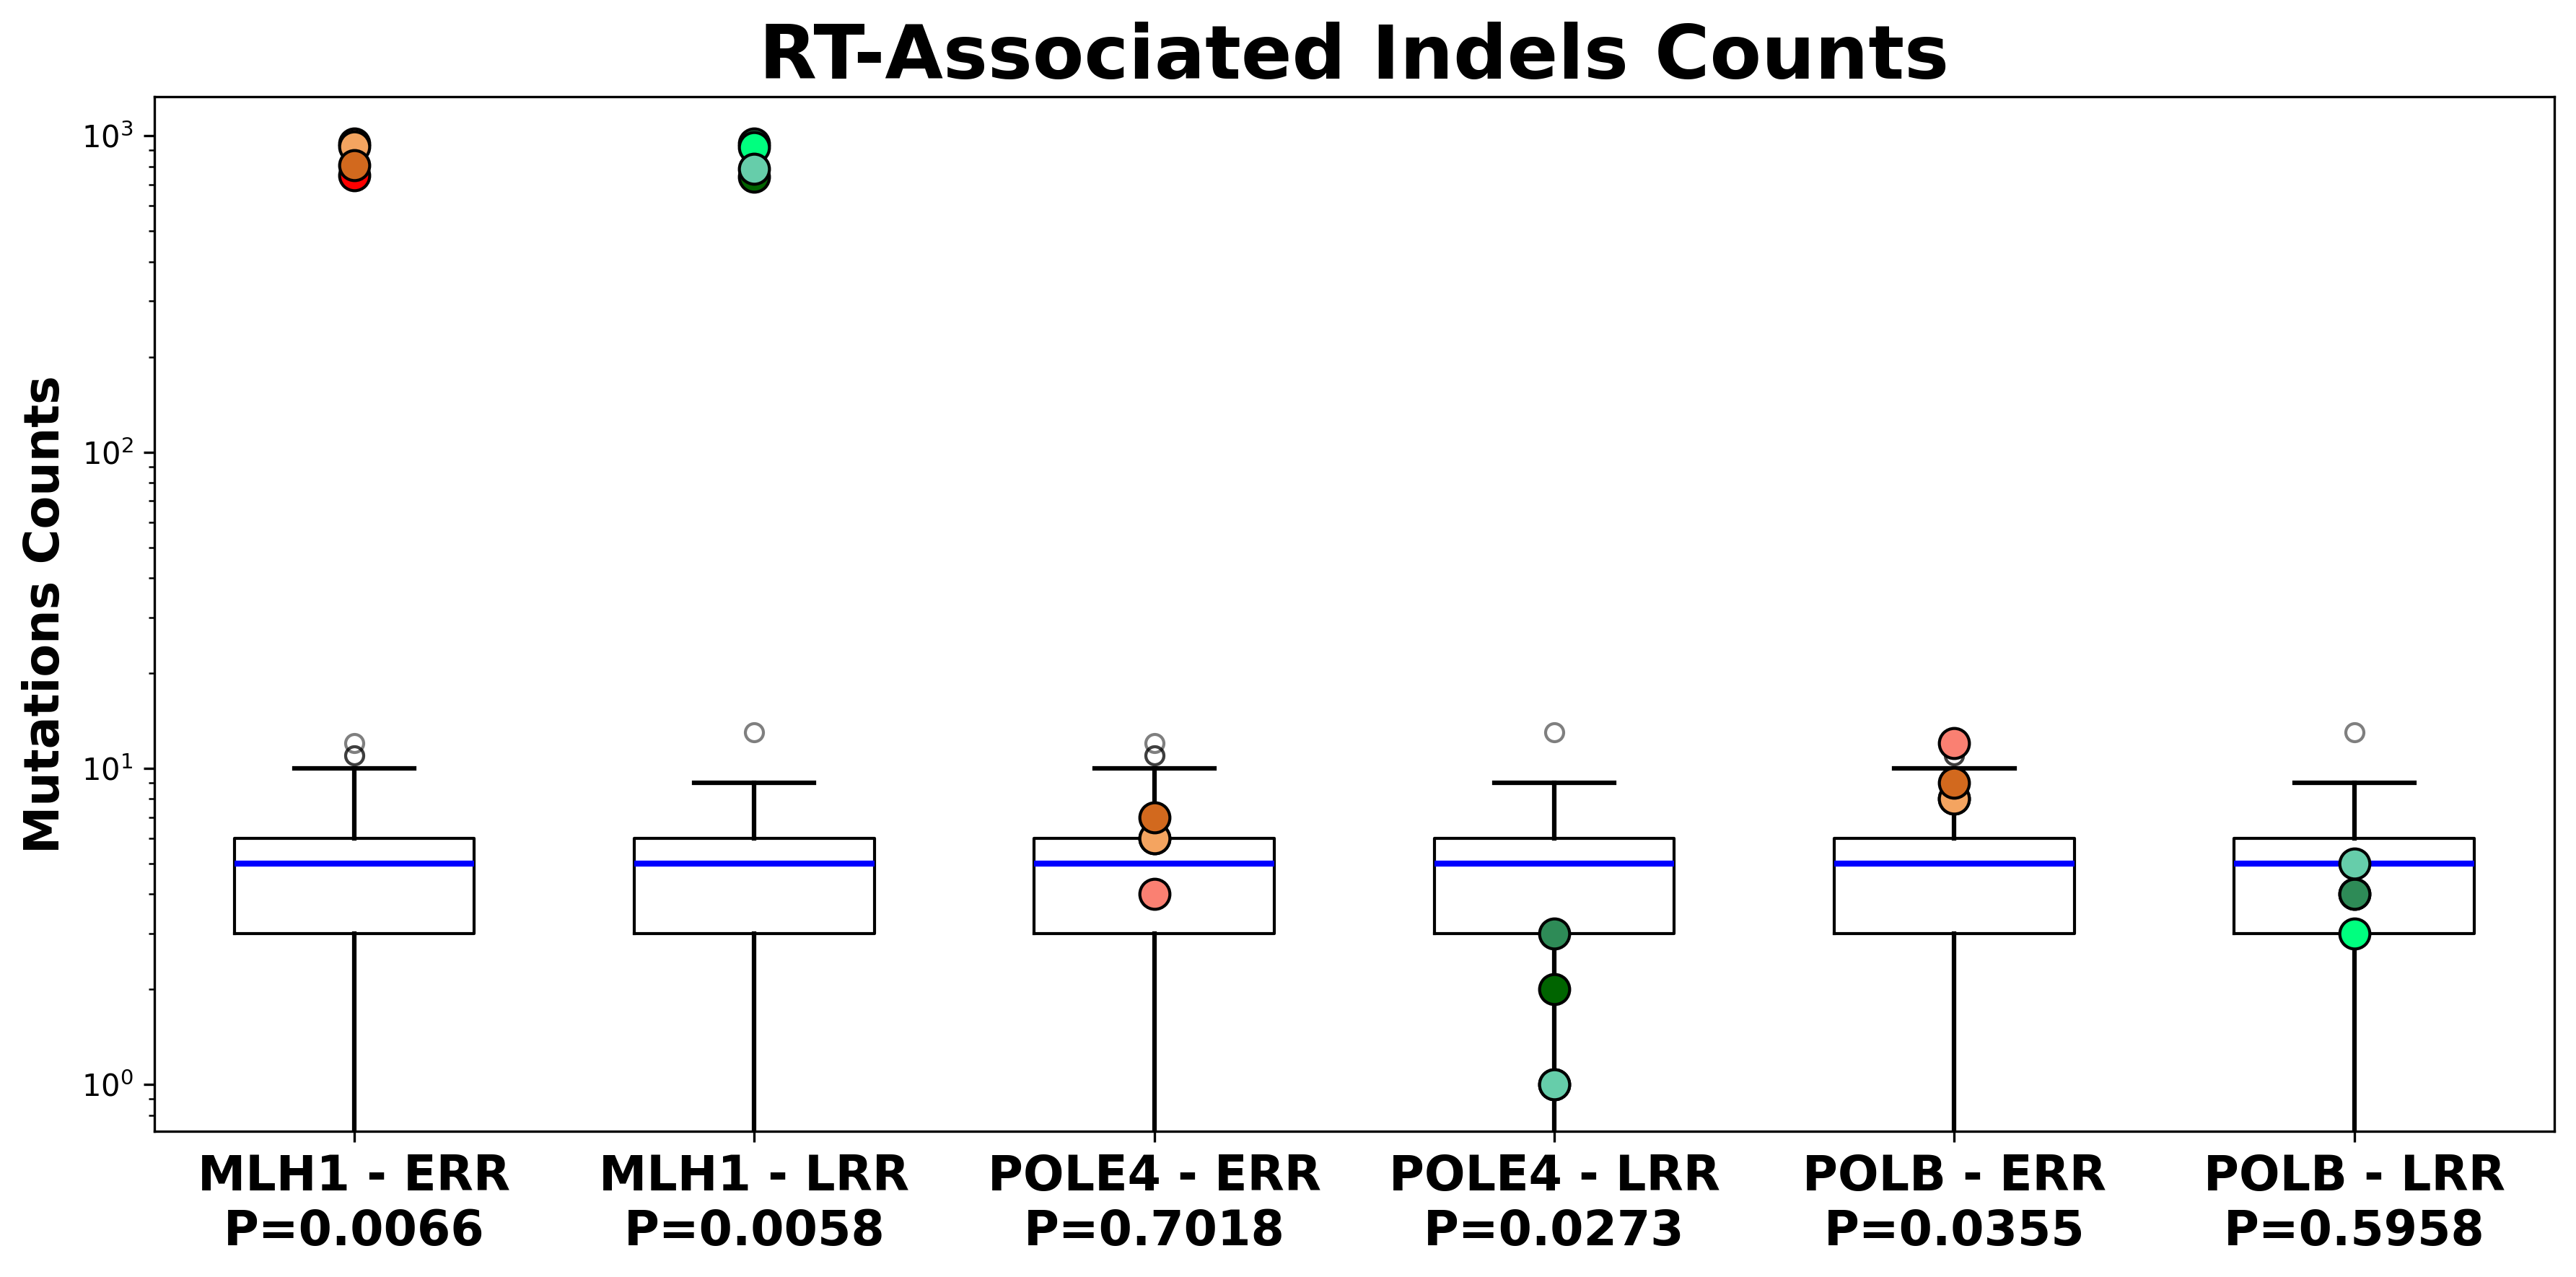

In [25]:
#boxplot of counts results - RT associated
# Sample data
i1= [i for i, val in enumerate(exp_names) if val.startswith('MLH1')] # indices of MLH1 ko
i2= [i for i, val in enumerate(exp_names) if val.startswith('POLE4')] # indices of POLE4 ko
i3= [i for i, val in enumerate(exp_names) if val.startswith('POLB')] # indices of POLB ko


#print(len(ind), ind, exp_names[ind[0]], exp_names[ind[1]], exp_names[ind[2]])
c_ko_1_e = [early_exp_counts[i] for i in i1] # distance of MLH1 ko from the control normalized center
c_ko_1_l = [late_exp_counts[i] for i in i1] # distance of MLH1 ko from the control normalized center
p_ko_1_e = [early_u_p_adj[i] for i in i1] # corrected p-values of MLH1 ko
p_ko_1_l = [late_u_p_adj[i] for i in i1] # corrected p-values of MLH1 ko

c_ko_2_e = [early_exp_counts[i] for i in i2] # distance of POLE4 ko from the control normalized center
c_ko_2_l = [late_exp_counts[i] for i in i2] # distance of POLE4 ko from the control normalized center
p_ko_2_e = [early_u_p_adj[i] for i in i2] # corrected p-values of POLE4 ko
p_ko_2_l = [late_u_p_adj[i] for i in i2] # corrected p-values of POLE4 ko

c_ko_3_e = [early_exp_counts[i] for i in i3] # distance of POLB ko from the control normalized center
c_ko_3_l = [late_exp_counts[i] for i in i3] # distance of POLB ko from the control normalized center
p_ko_3_e = [early_u_p_adj[i] for i in i3] # corrected p-values of POLB ko
p_ko_3_l = [late_u_p_adj[i] for i in i3] # corrected p-values of POLB ko


colors_early = ['red', 'salmon', 'sandybrown', 'chocolate']
colors_late = ['darkgreen', 'seagreen', 'springgreen', 'mediumaquamarine']

# Create the boxplot
plt.figure(figsize=(12, 6), dpi=300)

# Create the early boxplot
plt.boxplot(early_new_control_counts, positions=[1], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c) in enumerate(zip(c_ko_1_e, colors_early)):
    plt.scatter(1, value, color=c, s=100, edgecolor='black', zorder=3)

# Create the early boxplot
plt.boxplot(late_new_control_counts, positions=[2], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c) in enumerate(zip(c_ko_1_l, colors_late)):
    plt.scatter(2, value, color=c, s=100, edgecolor='black', zorder=3)

# Create the early boxplot
plt.boxplot(early_new_control_counts, positions=[3], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c) in enumerate(zip(c_ko_2_e, colors_early)):
    plt.scatter(3, value, color=c, s=100, edgecolor='black', zorder=3)

# Create the early boxplot
plt.boxplot(late_new_control_counts, positions=[4], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c) in enumerate(zip(c_ko_2_l, colors_late)):
    plt.scatter(4, value, color=c, s=100, edgecolor='black', zorder=3)

# Create the early boxplot
plt.boxplot(early_new_control_counts, positions=[5], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c) in enumerate(zip(c_ko_3_e, colors_early)):
    plt.scatter(5, value, color=c, s=100, edgecolor='black', zorder=3)

# Create the early boxplot
plt.boxplot(late_new_control_counts, positions=[6], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c) in enumerate(zip(c_ko_3_l, colors_late)):
    plt.scatter(6, value, color=c, s=100, edgecolor='black', zorder=3)

# Customize x-axis
plt.xticks([1, 2, 3, 4, 5, 6], [f'MLH1 - ERR\nP={gmean(p_ko_1_e):.4f}', f'MLH1 - LRR\nP={gmean(p_ko_1_l):.4f}', f'POLE4 - ERR\nP={gmean(p_ko_2_e):.4f}', f'POLE4 - LRR\nP={gmean(p_ko_2_l):.4f}', f'POLB - ERR\nP={gmean(p_ko_3_e):.4f}', f'POLB - LRR\nP={gmean(p_ko_3_l):.4f}'], fontsize=16, fontweight='bold')

# Add labels and legend
plt.yscale('log')
plt.ylabel('Mutations Counts', fontsize=16, fontweight='bold')
#plt.xlabel('Control bootstrapped data', fontsize=14, fontweight='bold')
plt.title('RT-Associated Indels Counts', fontsize=25, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.savefig('crispr_indels_diff_counts.png', format='png', dpi=300, bbox_inches='tight')
#plt.show()
#files.download('crispr_indels_diff_counts.png')

In [26]:
# excel file summarizing the results
# Zip the lists together
all_names = exp_names + control_names
data = zip(all_names, all_u_pvals, all_u_p_adj, early_u_pvals, early_u_p_adj, late_u_pvals, late_u_p_adj)

# Define the file name
file_name = 'knockouts_indels_statistics_2rt.csv'

# Write the data to a CSV file
with open(file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Name', 'ALL COUNTS P-val', 'ALL COUNTS P-adj', 'EARLY COUNTS P-val', 'EARLY COUNTS P-adj', 'LATE COUNTS P-val', 'LATE COUNTS P-adj'])  # Write header
    writer.writerows(data)  # Write data rows

print(f"CSV file '{file_name}' has been created.")


CSV file 'knockouts_indels_statistics_2rt.csv' has been created.


In [27]:
# fix data for heatmap summary
print(len(exp_names), exp_names, '\n', len(all_u_p_adj), all_u_p_adj[:3], '\n', len(early_u_p_adj), early_u_p_adj[:3], '\n', len(late_u_p_adj), late_u_p_adj[:3])
exp_names_cut = [name.split('_')[0] for name in exp_names]
print(len(exp_names_cut), exp_names_cut)

name = sorted(set(exp_names_cut))[0]
count_all = [all_u_p_adj[0]]
count_early = [early_u_p_adj[0]]
count_late = [late_u_p_adj[0]]

counter = 1
for n in exp_names_cut[1:]:
  if n == name: #same ko
    counter = counter+1
  else: #new KO
    count_all.append(all_u_p_adj[counter])
    count_early.append(early_u_p_adj[counter])
    count_late.append(late_u_p_adj[counter])
    counter = counter+1
    name = n


print(len(count_all), len(count_early), len(count_late))
print(count_all[:3], '\n', count_early[:3], '\n', count_late[:3])

164 ['ATM_148_s1', 'ATM_148_s2', 'ATM_16_s1', 'ATM_16_s2', 'C1orf86_136_s1', 'C1orf86_136_s2', 'C1orf86_139_s1', 'C1orf86_139_s2', 'C9orf142_113_s1', 'C9orf142_113_s2', 'C9orf142_129_s1', 'C9orf142_129_s2', 'DCLRE1A_41_s2', 'DCLRE1A_41_s4', 'DCLRE1A_42_s4', 'EXO1_71_s2', 'EXO1_71_s3', 'EXO1_71_s4', 'FAN1_122_s1', 'FAN1_122_s2', 'FAN1_19_s1', 'FAN1_19_s2', 'FANCM_10_s1', 'FANCM_10_s2', 'FANCM_140_s1', 'FANCM_140_s2', 'MDC1_126_s1', 'MDC1_126_s2', 'MDC1_126_s3', 'MDC1_126_s4', 'MLH1_172_s1', 'MLH1_172_s2', 'MLH1_173_s1', 'MLH1_173_s2', 'MSH2_120_s1', 'MSH2_120_s2', 'MSH2_120_s3', 'MSH6_3_s4', 'MSH6_3_s5', 'MSH6_3_s6', 'MSH6_3_s8', 'MSH6_4_s2', 'MSH6_4_s3', 'MSH6_4_s4', 'MSH6_4_s7', 'NBN_62_s3', 'NBN_62_s4', 'NHEJ1_65_s1', 'NHEJ1_65_s2', 'NHEJ1_9_s1', 'NHEJ1_9_s2', 'OGG1_106_s1', 'OGG1_106_s2', 'OGG1_25_s1', 'OGG1_25_s2', 'PARP1_128_s1', 'PARP1_128_s2', 'PARP1_18_s2', 'PARP2_137_s1', 'PARP2_137_s2', 'PARP2_96_s1', 'PARP2_96_s2', 'PIAS1_13_s1', 'PIAS1_13_s2', 'PIAS1_142_s1', 'PIAS1_142_s2'

In [28]:
print(len(exp_names_cut), exp_names_cut)
exp_names_cut_upd = sorted(set(exp_names_cut))
print(exp_names_cut_upd.index('TP53BP1'), exp_names_cut_upd.index('TP53'))
exp_names_cut_upd[37] = 'TP53BP1'
exp_names_cut_upd[38] = 'TP53'
print(exp_names_cut_upd.index('TP53BP1'), exp_names_cut_upd.index('TP53'))
print(exp_names_cut_upd)

164 ['ATM', 'ATM', 'ATM', 'ATM', 'C1orf86', 'C1orf86', 'C1orf86', 'C1orf86', 'C9orf142', 'C9orf142', 'C9orf142', 'C9orf142', 'DCLRE1A', 'DCLRE1A', 'DCLRE1A', 'EXO1', 'EXO1', 'EXO1', 'FAN1', 'FAN1', 'FAN1', 'FAN1', 'FANCM', 'FANCM', 'FANCM', 'FANCM', 'MDC1', 'MDC1', 'MDC1', 'MDC1', 'MLH1', 'MLH1', 'MLH1', 'MLH1', 'MSH2', 'MSH2', 'MSH2', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'NBN', 'NBN', 'NHEJ1', 'NHEJ1', 'NHEJ1', 'NHEJ1', 'OGG1', 'OGG1', 'OGG1', 'OGG1', 'PARP1', 'PARP1', 'PARP1', 'PARP2', 'PARP2', 'PARP2', 'PARP2', 'PIAS1', 'PIAS1', 'PIAS1', 'PIAS1', 'PIAS4', 'PIAS4', 'PIAS4', 'PIAS4', 'PIF1', 'PIF1', 'PIF1', 'PIF1', 'PMS1', 'PMS1', 'PMS1', 'PMS1', 'PMS2', 'PMS2', 'PMS2', 'PMS2', 'POLB', 'POLB', 'POLB', 'POLB', 'POLE3', 'POLE3', 'POLE3', 'POLE3', 'POLE4', 'POLE4', 'POLE4', 'POLE4', 'POLI', 'POLI', 'POLI', 'POLI', 'POLM', 'POLM', 'POLM', 'POLM', 'POLN', 'POLN', 'POLN', 'POLN', 'POLQ', 'POLQ', 'POLQ', 'POLQ', 'PRIMPOL', 'PRIMPOL', 'PRIMPOL', 'PRIMPOL', 'PRKDC', 

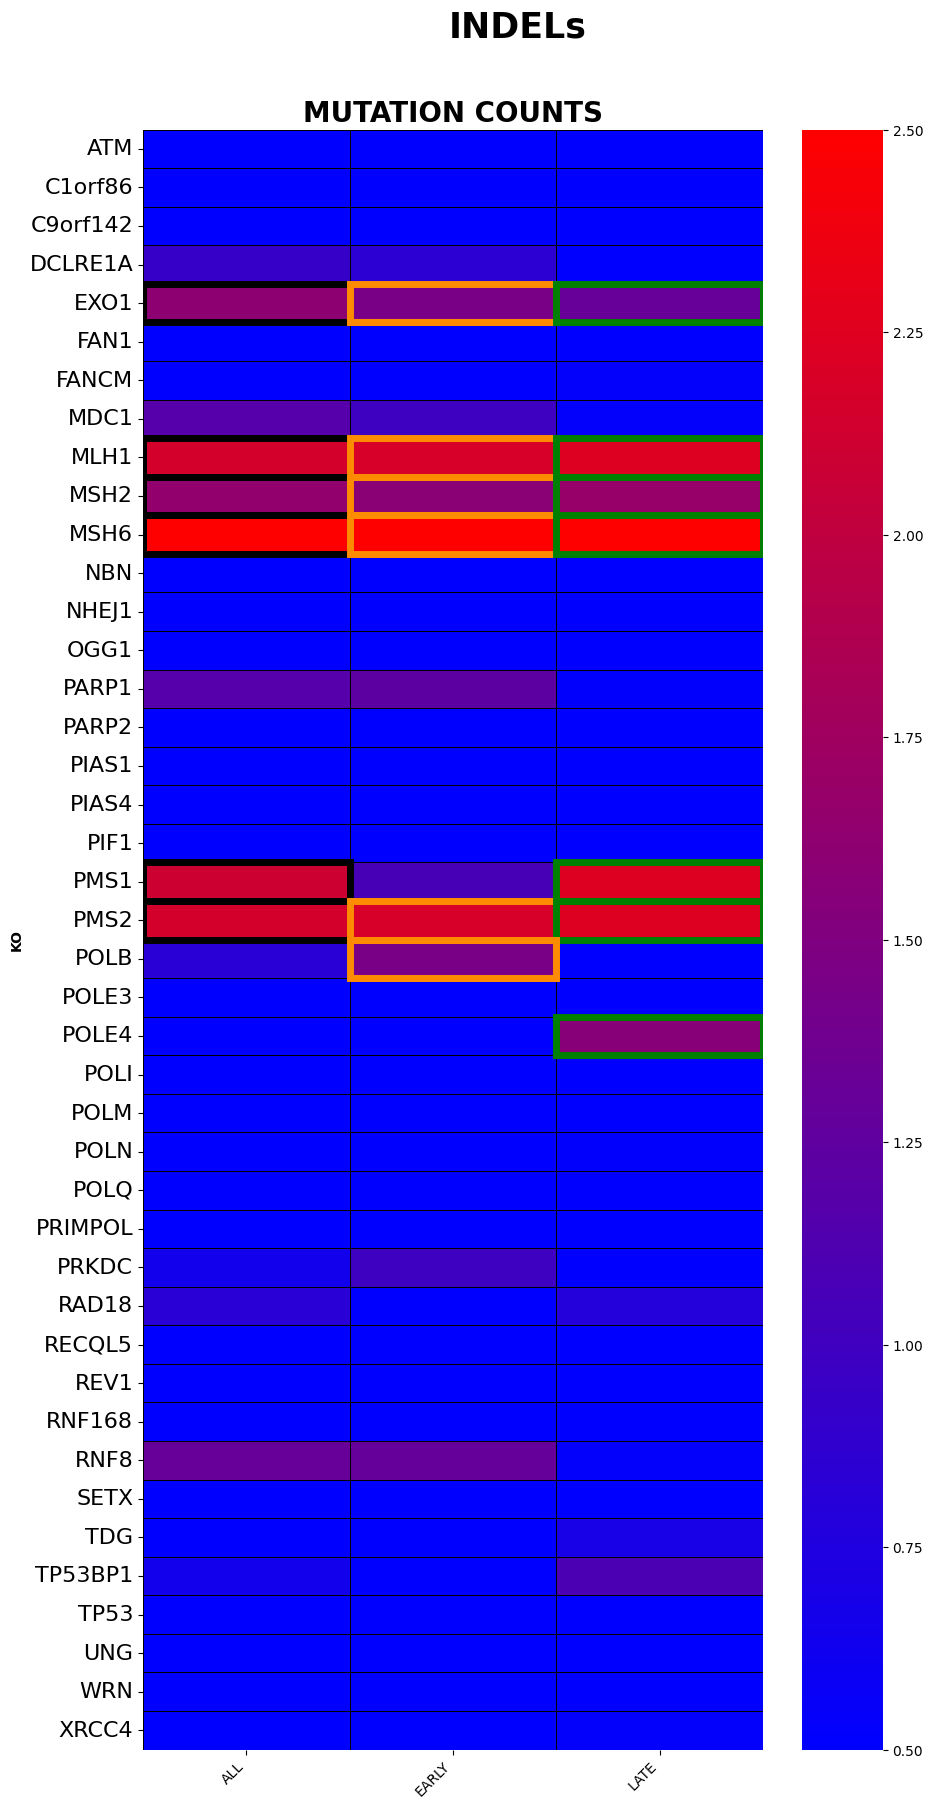

In [30]:
# summary of the results - heatmap

# Create DataFrame
df = pd.DataFrame({
    'COUNTS ALL': count_all,
    'COUNTS EARLY': count_early,
    'COUNTS LATE': count_late
}, index=exp_names_cut_upd)

# Transform to -log10
df_counts_trans = -np.log10(df.replace(0, 1e-10))

threshold = 1.3

# Set up figure
fig, ax = plt.subplots(figsize=(10, 20))

# Create custom blue-to-red colormap (no white in middle)
colors = ['blue', 'red']
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_blue_red', colors)

vmin_val = 0.5
vmax_val = 2.5

# Plot the heatmap
sns.heatmap(df_counts_trans,
            cmap=custom_cmap,
            vmin=vmin_val, vmax=vmax_val,
            linewidths=0.5,
            annot=False,
            ax=ax,
            cbar=True,
            linecolor='black')

edge_colors = {
    0: 'black',   # COUNTS ALL
    1: 'darkorange',    # COUNTS EARLY
    2: 'green'   # COUNTS LATE
}

for y in range(df_counts_trans.shape[0]):
    for x in range(df_counts_trans.shape[1]):
        if df_counts_trans.iloc[y, x] > threshold:
            color = edge_colors.get(x, 'yellow')
            rect = patches.Rectangle((x, y), 1, 1, fill=False, edgecolor=color, linewidth=5)
            ax.add_patch(rect)

# Styling
ax.set_title("MUTATION COUNTS", fontsize=20, fontweight='bold')
#ax.set_xlabel("Condition", fontweight='bold')
ax.set_ylabel("KO", fontweight='bold')
ax.set_xticklabels(['ALL', 'EARLY', 'LATE'], rotation=45, ha='right')
ax.tick_params(axis='y', labelsize=16)

# Overall title
fig.suptitle("INDELs", fontsize=25, fontweight='bold')
fig.subplots_adjust(top=0.92)

plt.show()